<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab 3.02: Statistical Modeling and Model Validation

> Authors: Tim Book, Matt Brems

---

## Objective
The goal of this lab is to guide you through the modeling workflow. In this lesson, you will follow all best practices when slicing your data and validating your model. The goal of this lab is not necessarily to build the best model you can, but to build and evaluate a model, and interpret its results.

## Imports

In [1]:
# Import everything you need here.
# You may want to return to this cell to import more things later in the lab.
# DO NOT COPY AND PASTE FROM OUR CLASS SLIDES!
# Muscle memory is important!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Read Data
The `citibike` dataset consists of Citi Bike ridership data for over 224,000 rides in February 2014.

In [2]:
# Read in the citibike data in the data folder in this repository.

df = pd.read_csv('./data/citibike_feb2014.csv')

## Explore the data
Use this space to familiarize yourself with the data.

If you find any issues, clean them here.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224736 entries, 0 to 224735
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             224736 non-null  int64  
 1   starttime                224736 non-null  object 
 2   stoptime                 224736 non-null  object 
 3   start station id         224736 non-null  int64  
 4   start station name       224736 non-null  object 
 5   start station latitude   224736 non-null  float64
 6   start station longitude  224736 non-null  float64
 7   end station id           224736 non-null  int64  
 8   end station name         224736 non-null  object 
 9   end station latitude     224736 non-null  float64
 10  end station longitude    224736 non-null  float64
 11  bikeid                   224736 non-null  int64  
 12  usertype                 224736 non-null  object 
 13  birth year               224736 non-null  object 
 14  gend

In [4]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [5]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000,224736.000000
mean,874.519810,439.203479,40.734366,-73.990386,440.741995,40.734221,-73.990521,18010.598222,1.154617
std,5486.092219,335.723861,0.019031,0.011853,341.497433,0.019048,0.011920,1987.769335,0.436592
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,360.000000,305.000000,40.721854,-73.998522,305.000000,40.721816,-73.999061,16302.000000,1.000000
50%,544.000000,403.000000,40.736197,-73.990617,403.000000,40.735877,-73.990741,17975.000000,1.000000
75%,845.000000,490.000000,40.749156,-73.981918,488.000000,40.749013,-73.981948,19689.000000,1.000000
max,766108.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21542.000000,2.000000


In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,382,2014-02-01 00:00:00,2014-02-01 00:06:22,294,Washington Square E,40.730494,-73.995721,265,Stanton St & Chrystie St,40.722293,-73.991475,21101,Subscriber,1991,1
1,372,2014-02-01 00:00:03,2014-02-01 00:06:15,285,Broadway & E 14 St,40.734546,-73.990741,439,E 4 St & 2 Ave,40.726281,-73.989780,15456,Subscriber,1979,2
2,591,2014-02-01 00:00:09,2014-02-01 00:10:00,247,Perry St & Bleecker St,40.735354,-74.004831,251,Mott St & Prince St,40.723180,-73.994800,16281,Subscriber,1948,2
3,583,2014-02-01 00:00:32,2014-02-01 00:10:15,357,E 11 St & Broadway,40.732618,-73.991580,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,17400,Subscriber,1981,1
4,223,2014-02-01 00:00:41,2014-02-01 00:04:24,401,Allen St & Rivington St,40.720196,-73.989978,439,E 4 St & 2 Ave,40.726281,-73.989780,19341,Subscriber,1990,1


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [8]:
df['gender'].value_counts()

1    176526
2     41479
0      6731
Name: gender, dtype: int64

### Is averagvalue_counts duration different by gender?

Conduct a hypothesis test that checks whether or not the average trip duration is different for `gender=1` and `gender=2`. Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly!

In [9]:
# Setting up data

In [10]:
df_g0 = df[df['gender'] == 0][['gender', 'tripduration']]

In [11]:
df_g1 = df[df['gender'] == 1][['gender', 'tripduration']]

In [12]:
df_g2 = df[df['gender'] == 2][['gender', 'tripduration']]

In [13]:
df_g0.head()

,gender,tripduration
31,0,664
55,0,836
222,0,1277
266,0,29906
293,0,2625


In [14]:
df_g1.head()

,gender,tripduration
0,1,382
3,1,583
4,1,223
5,1,541
6,1,354


In [15]:
df_g2.head()

,gender,tripduration
1,2,372
2,2,591
9,2,439
18,2,292
19,2,259


In [16]:
'''
Null Hypothesis:

There is no difference between the gender designations for the average trip duration

Alternative Hypothesis:

There is a difference between the three gender designations for the average trip duration
''';

In [17]:
# For me to consider any difference, we need to compare
# 0 and 1
# 0 and 2
# 1 and 2
# 2 and 0

In [18]:
# We will conduct 2-tailed parametric tests
# We are using parametric tests because we are assuming there is an underlying distribution

In [19]:
# 0 and 1
z_o = list(stats.ttest_ind(df_g0['tripduration'], df_g1['tripduration']))

In [20]:
# 1 and 0
o_z = list(stats.ttest_ind(df_g1['tripduration'], df_g0['tripduration']))

In [21]:
# 0 and 2
z_t = list(stats.ttest_ind(df_g0['tripduration'], df_g2['tripduration']))

In [22]:
# 1 and 2
o_t = list(stats.ttest_ind(df_g1['tripduration'], df_g2['tripduration']))

In [23]:
# according to my testing, switching the terms creates negative values
# so we only need to conduct 3 two tailed tests

In [24]:
tests = [z_o, z_t, o_t]

In [25]:
index = ['statistic', 'pvalue']

In [26]:
columns = ['tt(0,1)', 'tt(0,2)', 'tt(1,2)']

In [27]:
t_tests = pd.DataFrame(tests, columns=index, index=columns)

In [28]:
# All of the pvalues from the two tailed hypothesis tests are stores in this DataFrame 
# and then we can easily interpert the results

# We are searching for a pvalue between 0.05 and 0.00

In [29]:
t_tests

,statistic,pvalue
"tt(0,1)",14.802193,1.514626e-49
"tt(0,2)",8.242725,1.725277e-16
"tt(1,2)",-5.929304,3.046763e-09


In [30]:
t_tests['0.05 > pvalue > 0.00'] = (t_tests['pvalue'] < 0.05) & (t_tests['pvalue'] > 0.0)

In [31]:
t_tests

,statistic,pvalue,0.05 > pvalue > 0.00
"tt(0,1)",14.802193,1.514626e-49,True
"tt(0,2)",8.242725,1.725277e-16,True
"tt(1,2)",-5.929304,3.046763e-09,True


In [32]:
# We accept the alternative hypothesis, because our pvalues are within the bounds

### What numeric columns shouldn't be treated as numeric?

**Answer:**

In [33]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [34]:
# Start Station ID, End station ID, Bike ID

### Dummify the `start station id` Variable

In [35]:
df = df.join(pd.get_dummies(df['start station id']))

## Feature Engineering
Engineer a feature called `age` that shares how old the person would have been in 2014 (at the time the data was collected)
- Note: you will need to clean the data a bit.

In [36]:
# Sort by birth year, change string into np.nan, convert to numeric series, reassign to orignal
# dataframe

In [37]:
df['birth year'] = pd.to_numeric(df['birth year'].replace('\\N', np.nan))

In [38]:
df['age'] = 2014 - df['birth year']

In [39]:
df.count()

tripduration          224736
starttime             224736
stoptime              224736
start station id      224736
start station name    224736
                       ...  
2021                  224736
2022                  224736
2023                  224736
3002                  224736
age                   218019
Length: 345, dtype: int64

In [40]:
df.columns

Index([           'tripduration',               'starttime',
                      'stoptime',        'start station id',
            'start station name',  'start station latitude',
       'start station longitude',          'end station id',
              'end station name',    'end station latitude',
       ...
                            2008,                      2009,
                            2010,                      2012,
                            2017,                      2021,
                            2022,                      2023,
                            3002,                     'age'],
      dtype='object', length=345)

In [41]:
df = df.dropna()

## Split your data into train/test sets

Look at the size of your data. What is a good proportion for your split? **Justify your answer, considering the size of your data and the default split size in sklearn.**

Use the `tripduration` column as your `y` variable.

For your `X` variables, use `age`, `usertype`, `gender`, and the dummy variables you created from `start station id`. (Hint: You may find the Pandas `.drop()` method helpful here.) 

In [42]:
X = df.drop(['tripduration','stoptime','start station name', 'end station name', 'starttime', 'start station id', 'start station latitude', 'end station id', 'end station latitude'], axis=1)

In [43]:
X.columns

Index(['start station longitude',   'end station longitude',
                        'bikeid',                'usertype',
                    'birth year',                  'gender',
                              72,                        79,
                              82,                        83,
       ...
                            2008,                      2009,
                            2010,                      2012,
                            2017,                      2021,
                            2022,                      2023,
                            3002,                     'age'],
      dtype='object', length=336)

In [44]:
X = X.drop(['start station longitude','bikeid','birth year','end station longitude'], axis=1)

In [45]:
X.head()

,usertype,gender,72,79,82,83,116,119,120,127,...,2008,2009,2010,2012,2017,2021,2022,2023,3002,age
0,Subscriber,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23.0
1,Subscriber,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35.0
2,Subscriber,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66.0
3,Subscriber,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33.0
4,Subscriber,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24.0


In [46]:
# converting another column to dummies
X = X.join(pd.get_dummies(df['usertype']))

In [47]:
X = X.drop('usertype', axis=1)

In [48]:
X.head()

,gender,72,79,82,83,116,119,120,127,128,...,2009,2010,2012,2017,2021,2022,2023,3002,age,Subscriber
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23.0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35.0,1
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,66.0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,33.0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24.0,1


In [49]:
# All categeorical columns desired have been converted into numerical dummy representatives

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, df['tripduration'])

In [51]:
len(X_train)

163514

In [52]:
len(X_test)

54505

In [53]:
# I think a 20% split of the data is good enough.
# 20% of the orignal dataset is still 56,184 unique data entries

## Fit a Linear Regression model in `sklearn` predicting `tripduration`.

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X=X_train, y=y_train)

LinearRegression()

## Evaluate your model
Look at some evaluation metrics for **both** the training and test data. 
- How did your model do? Is it overfit, underfit, or neither?
- Does this model outperform the baseline? (e.g. setting $\hat{y}$ to be the mean of our training `y` values.)

In [56]:
# Let's return R^2
'''
Source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of 
squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares 
((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can 
be negative (because the model can be arbitrarily worse). A constant model that 
always predicts the expected value of y, disregarding the input features, 
would get a R^2 score of 0.0.
''';

In [57]:
lr.score(X_train, y_train)

0.004020540324773947

In [58]:
lr.score(X_test, y_test)

-0.0025075982398998775

In [59]:
# Looking at the R^2 Value for both training and testing data. 
# We can consider another definition
'''
Source: https://www.investopedia.com/terms/r/r-squared.asp#:~:text=What%20Is%20R-Squared%3F,variables%20in%20a%20regression%20model.

What Is R-Squared?
R-squared (R2) is a statistical measure that represents the proportion of the 
variance for a dependent variable that's explained by an independent variable 
or variables in a regression model. Whereas correlation explains the strength 
of the relationship between an independent and dependent variable, R-squared 
explains to what extent the variance of one variable explains the variance of 
the second variable. So, if the R2 of a model is 0.50, then approximately half 
of the observed variation can be explained by the model's inputs.
''';

In [60]:
# The R2 of our test model is 0.002, which says 2 % of the observed variation can 
# be explained by model inputs

# source : https://www.researchgate.net/post/Low_R-squared#:~:text=A%20low%20R-squared%20value,of%20the%20mean%20of%20your
'''
A low R-squared value indicates that your independent variable is not explaining
much in the variation of your dependent variable - regardless of the variable significance, 
this is letting you know that the identified independent variable, even though significant, 
is not accounting for much of the mean of your dependent variable. 
''';

# A low R2 value in our case is saying that all of our independent variables
# are barely affecting our predictor, trip duration

Text(0, 0.5, 'Actual Trip Value')

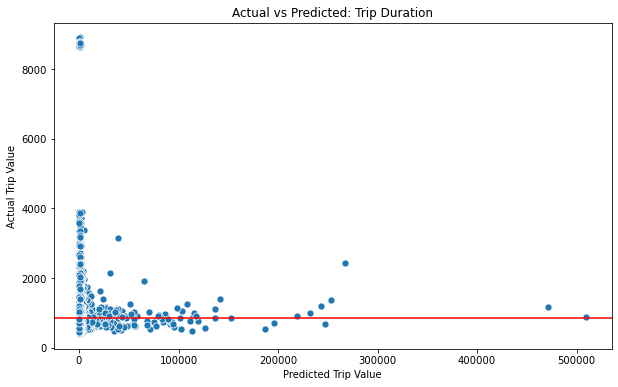

In [61]:
plt.figure(figsize=(10, 6))
plt.title('Actual vs Predicted: Trip Duration')
plt.axhline(y_test.mean(), c='r')
sns.scatterplot(y_test, lr.predict(X_test), s=50)
plt.xlabel('Predicted Trip Value')
plt.ylabel('Actual Trip Value')

In [62]:
# There is a slight linear correlation. The model does a poor job predicting
# Because the model does not take into account what a realistic human is able to do in
# a single trip

## Fit a Linear Regression model in `statsmodels` predicting `tripduration`.

In [63]:
# am going to ignore all of the dummy variables

In [64]:
ols = sm.OLS(y_train,X_train['age'])

In [65]:
model = ols.fit()

## Evaluate your model
Using the `statsmodels` summary, test whether or not `age` has a significant effect when predicting `tripduration`.
- Be sure to specify your null and alternative hypotheses, and to state your conclusion carefully and correctly **in the context of your model**!

In [66]:
# Null Hypothesis: Age does not have a significant effect on predicting tripduration
# Alternative Hypothesis: Age does have a significant effect on predicting tripduration

In [67]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           tripduration   R-squared (uncentered):                   0.021
Model:                            OLS   Adj. R-squared (uncentered):              0.021
Method:                 Least Squares   F-statistic:                              3512.
Date:                Mon, 14 Sep 2020   Prob (F-statistic):                        0.00
Time:                        00:10:55   Log-Likelihood:                     -1.6441e+06
No. Observations:              163514   AIC:                                  3.288e+06
Df Residuals:                  163513   BIC:                                  3.288e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
# Source: https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/#:~:text=If%20you%20get%20a%20large,of%20all%20the%20variables%20together.
# Looking at the numbers from the OLS analysis,
# our F statistic = 3512 (also the F criticial)

In [85]:
model.fvalue

3512.336600353026

In [80]:
model.pvalues

age    0.0
dtype: float64

In [77]:
print(model.f_test("age"))

<F test: F=array([[3512.33660035]]), p=0.0, df_denom=1.64e+05, df_num=1>


In [86]:
# According to the F statistic, we fail to reject the null hypothesis

In [87]:
##### I still do not understand this well

In [74]:
# The following plot was taken from the documentation source
# source: https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

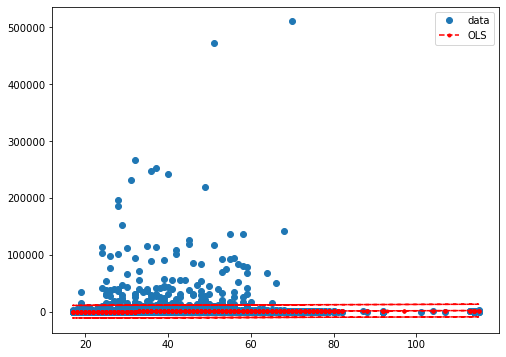

In [71]:
prstd, iv_l, iv_u = wls_prediction_std(model)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_test['age'], y_test, 'o', label="data")
#ax.plot(X_test['age'], y_test, 'b-', label="True")
ax.plot(X_train['age'], model.fittedvalues, 'r--.', label="OLS")
ax.plot(X_train['age'], iv_u, 'r--')
ax.plot(X_train['age'], iv_l, 'r--')
ax.legend(loc='best');